In [1]:
import numpy as np 
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

C:\Users\KIIT\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
Crema_Path='D:/Project/codeclause/Speech Emotion Recognization/archive/Crema'
Ravdess_Path='D:/Project/codeclause/Speech Emotion Recognization/archive/Ravdess'
Savee_Path='D:/Project/codeclause/Speech Emotion Recognization/archive/Savee'


# Data Analyze

In [3]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                                          File_Path
0    angry  D:/Project/codeclause/Speech Emotion Recogniza...
1  disgust  D:/Project/codeclause/Speech Emotion Recogniza...
2     fear  D:/Project/codeclause/Speech Emotion Recogniza...
3    happy  D:/Project/codeclause/Speech Emotion Recogniza...
4  neutral  D:/Project/codeclause/Speech Emotion Recogniza...

In [4]:
Crema_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [5]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0  neutral  D:/Project/codeclause/Speech Emotion Recogniza...
1  neutral  D:/Project/codeclause/Speech Emotion Recogniza...
2  neutral  D:/Project/codeclause/Speech Emotion Recogniza...
3  neutral  D:/Project/codeclause/Speech Emotion Recogniza...
4  neutral  D:/Project/codeclause/Speech Emotion Recogniza...

In [6]:
Ravdess_df['Emotion'].unique()

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [7]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                                          File_Path
0   angry  D:/Project/codeclause/Speech Emotion Recogniza...
1   angry  D:/Project/codeclause/Speech Emotion Recogniza...
2   angry  D:/Project/codeclause/Speech Emotion Recogniza...
3   angry  D:/Project/codeclause/Speech Emotion Recogniza...
4   angry  D:/Project/codeclause/Speech Emotion Recogniza...

In [8]:
Savee_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [9]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df],axis=0)
main_df.shape

(9362, 2)

In [10]:
main_df.head(15)

Emotion                                          File_Path
0     angry  D:/Project/codeclause/Speech Emotion Recogniza...
1   disgust  D:/Project/codeclause/Speech Emotion Recogniza...
2      fear  D:/Project/codeclause/Speech Emotion Recogniza...
3     happy  D:/Project/codeclause/Speech Emotion Recogniza...
4   neutral  D:/Project/codeclause/Speech Emotion Recogniza...
5       sad  D:/Project/codeclause/Speech Emotion Recogniza...
6     angry  D:/Project/codeclause/Speech Emotion Recogniza...
7     angry  D:/Project/codeclause/Speech Emotion Recogniza...
8     angry  D:/Project/codeclause/Speech Emotion Recogniza...
9   disgust  D:/Project/codeclause/Speech Emotion Recogniza...
10  disgust  D:/Project/codeclause/Speech Emotion Recogniza...
11  disgust  D:/Project/codeclause/Speech Emotion Recogniza...
12     fear  D:/Project/codeclause/Speech Emotion Recogniza...
13     fear  D:/Project/codeclause/Speech Emotion Recogniza...
14     fear  D:/Project/codeclause/Speech Emotion Recogniza...

In [11]:
main_df.tail(15)

Emotion                                          File_Path
465  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
466  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
467  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
468  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
469  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
470  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
471  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
472  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
473  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
474  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
475  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
476  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
477  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
478  surprise  D:/Project/codeclause/Speech Emotion Recogniza...
479  surprise  D:/Project/codeclause/Speech Emotion Recogniza...

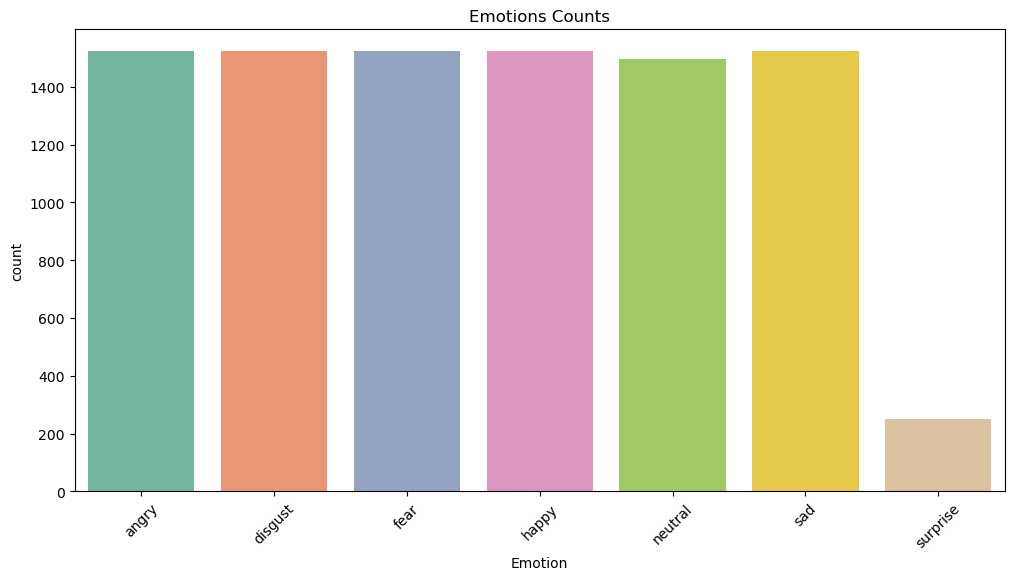

In [12]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [13]:
emotion_names=main_df['Emotion'].unique()

In [14]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [15]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [16]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

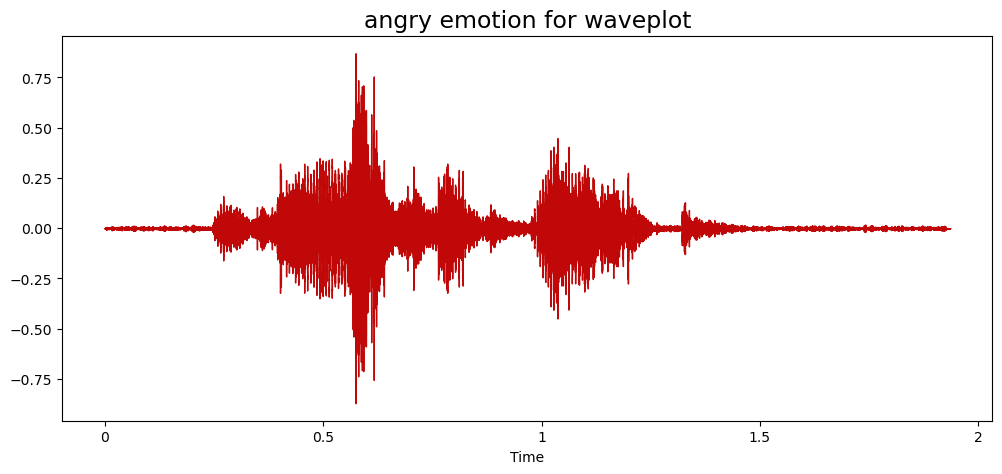

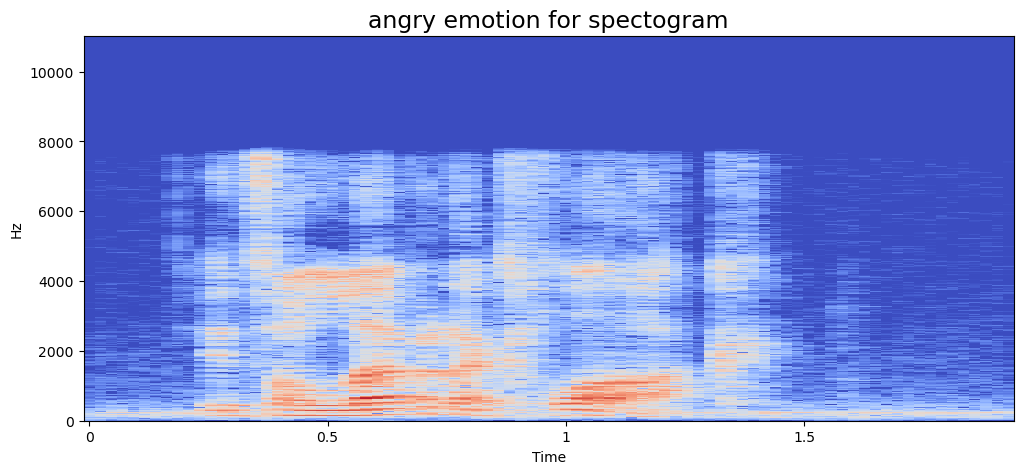

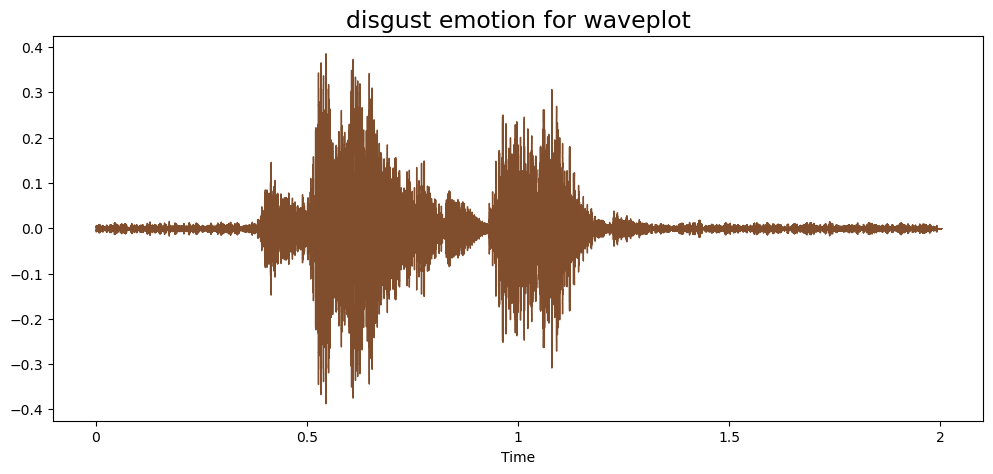

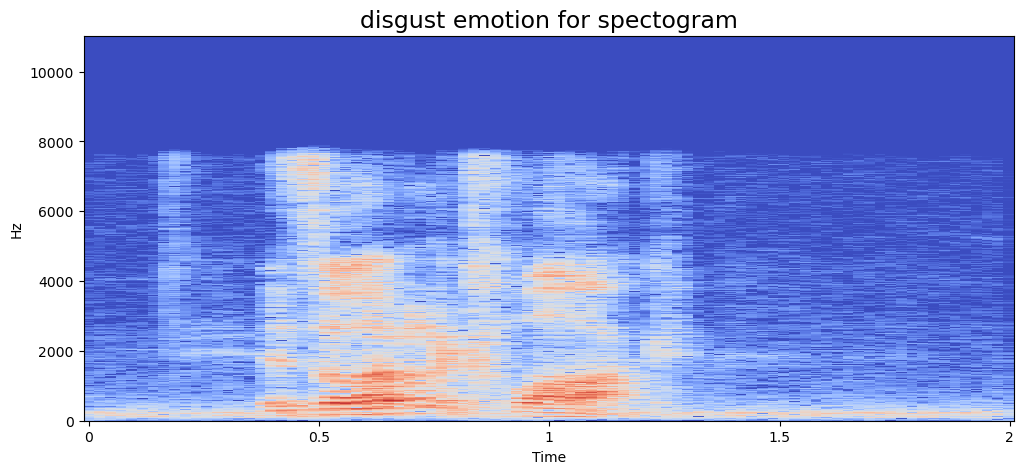

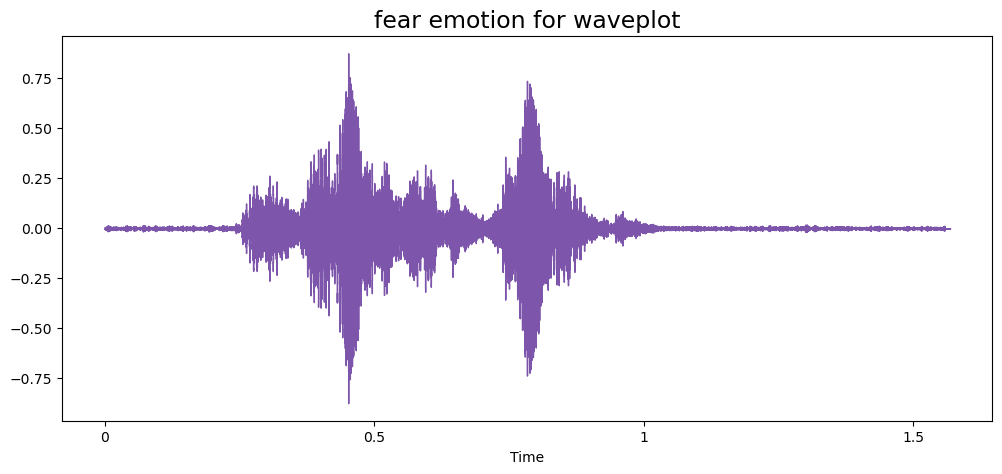

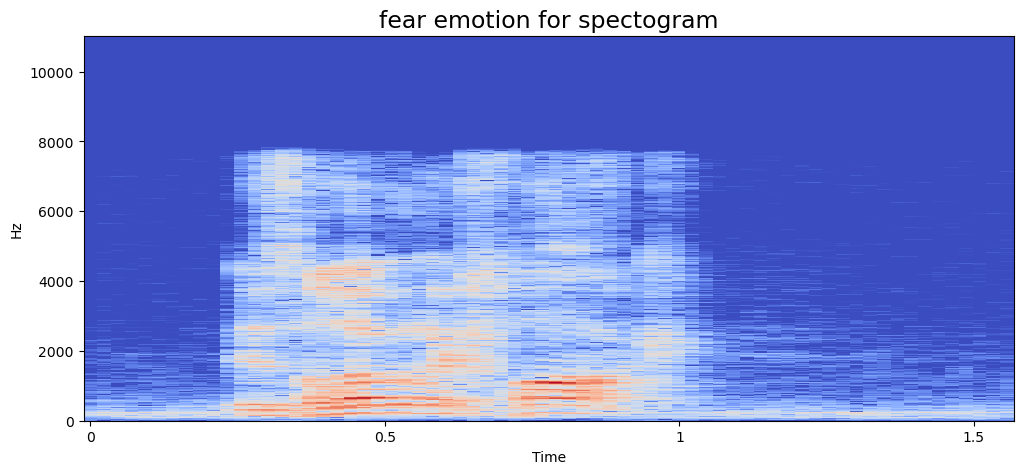

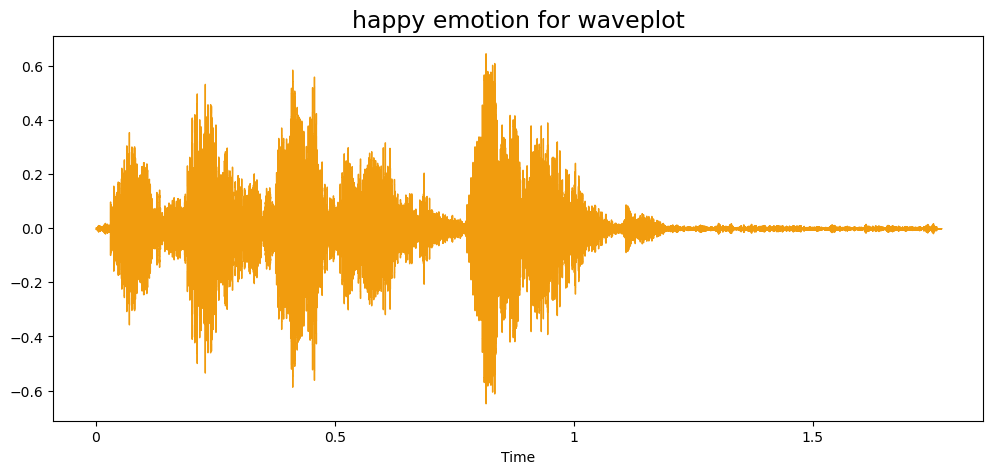

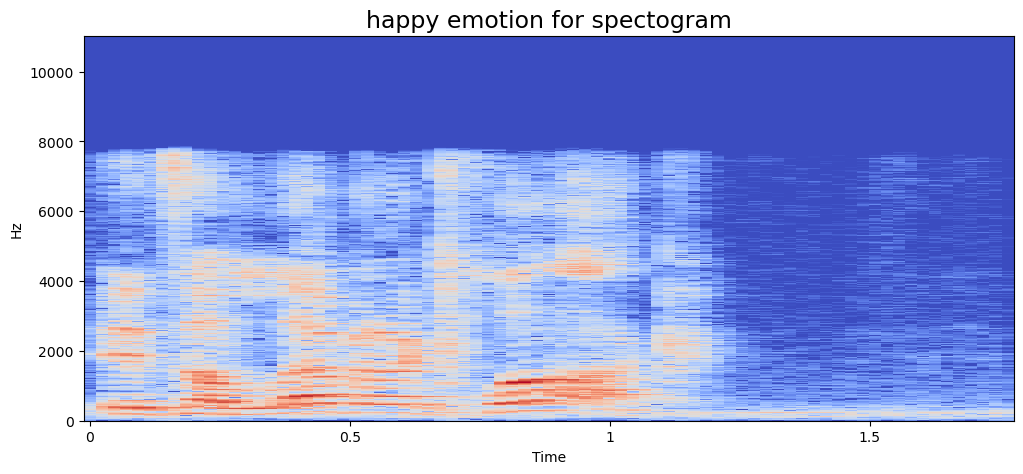

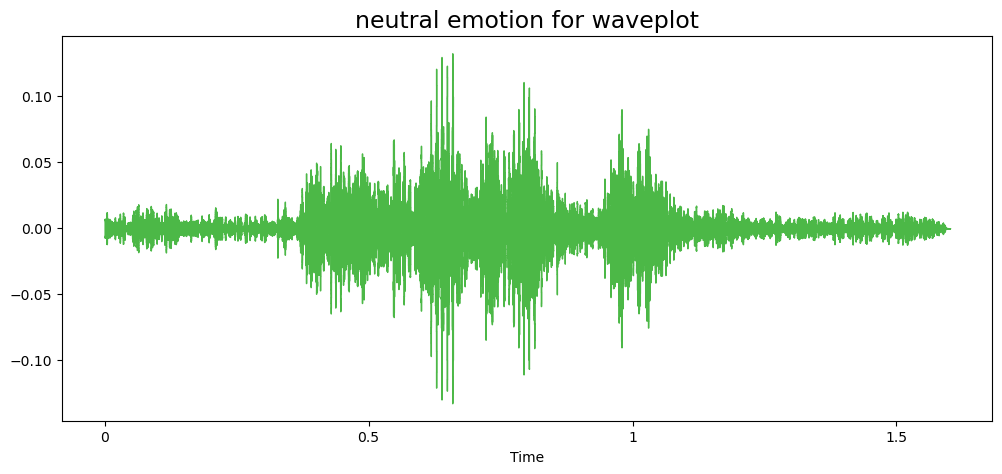

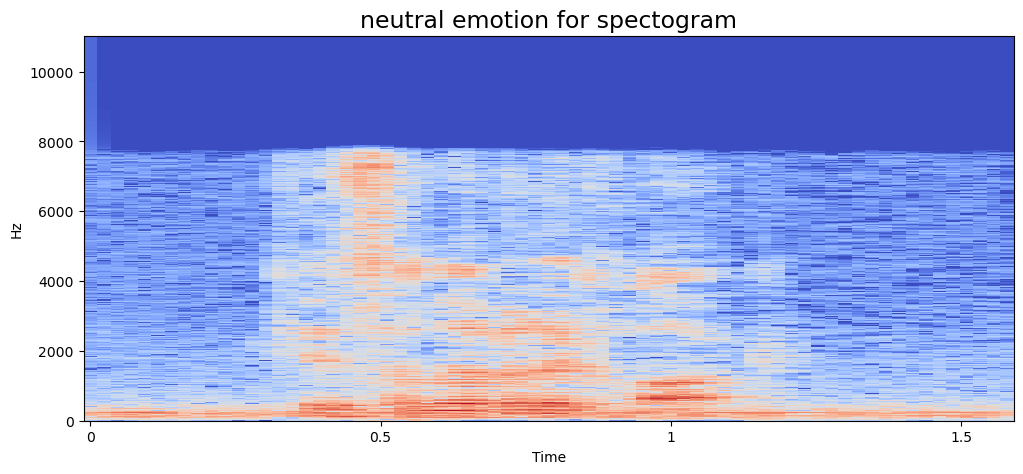

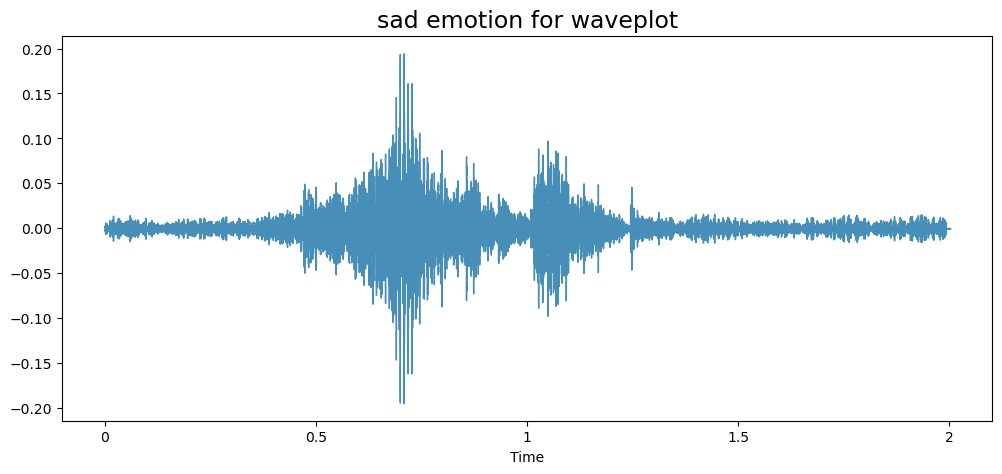

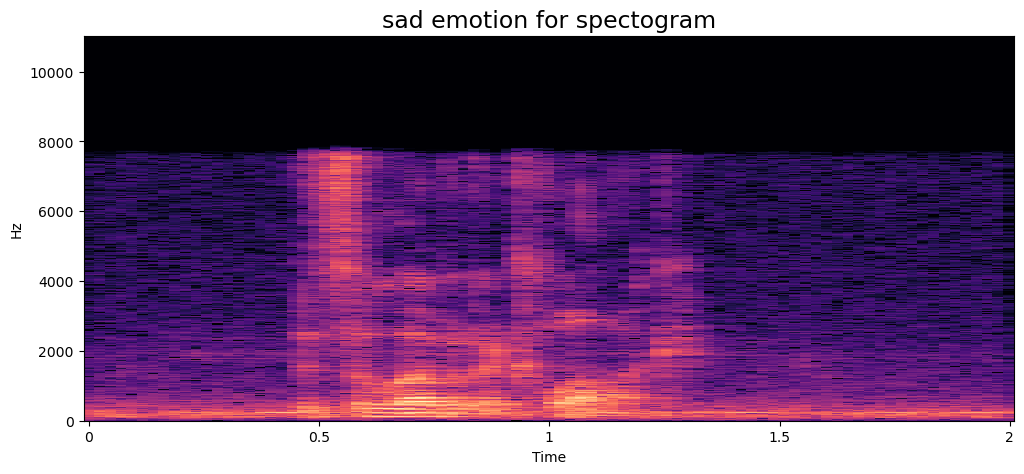

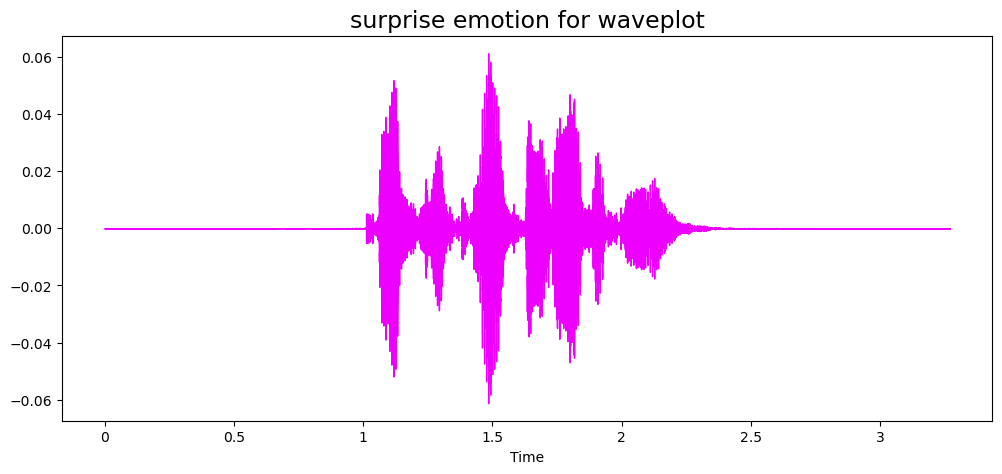

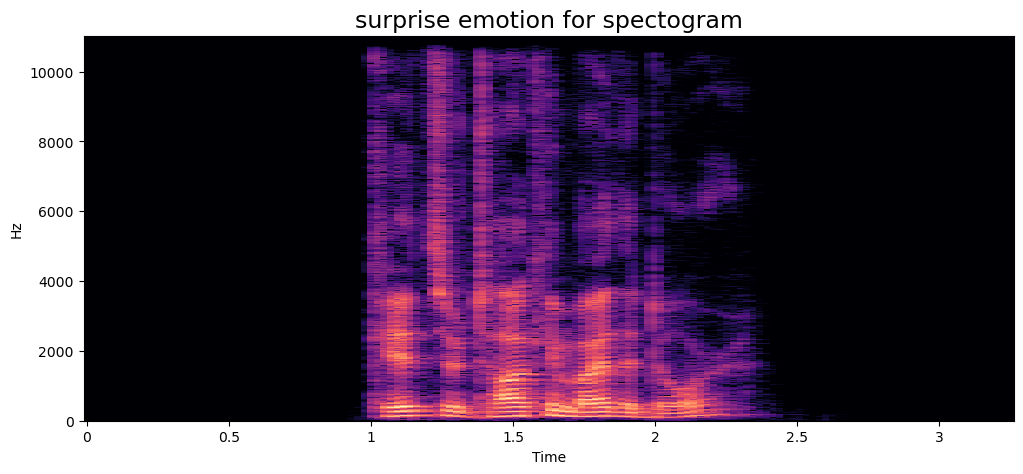

In [17]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [18]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [19]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [20]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [21]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [22]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [23]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [24]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [25]:
data,sr=librosa.load(audio_path[6])

# Feature Extraction

In [26]:
def extract_features(data, sr):
    # Extract features using librosa
    rms = np.sqrt(np.mean(data**2))
    zcr = np.mean(librosa.feature.zero_crossing_rate(data))  # ZCR feature
    mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13), axis=1)  # MFCC features
    
    # Combine all features into a single array
    features = np.hstack((rms, zcr, mfccs))
    return features

# Apply feature extraction to each row in the dataframe
main_df['Features'] = main_df.apply(lambda row: extract_features(*librosa.load(row['File_Path'])), axis=1)

print(main_df.head())

   Emotion                                          File_Path  \
0    angry  D:/Project/codeclause/Speech Emotion Recogniza...   
1  disgust  D:/Project/codeclause/Speech Emotion Recogniza...   
2     fear  D:/Project/codeclause/Speech Emotion Recogniza...   
3    happy  D:/Project/codeclause/Speech Emotion Recogniza...   
4  neutral  D:/Project/codeclause/Speech Emotion Recogniza...   

                                            Features  
0  [0.06457989662885666, 0.08058120265151515, -34...  
1  [0.02232256717979908, 0.0690942141089109, -388...  
2  [0.07666730135679245, 0.06276491855053191, -35...  
3  [0.06436506658792496, 0.06389250578703703, -33...  
4  [0.03050936572253704, 0.06154563210227273, -36...  


# Processing

In [27]:
# Process the features and create a new DataFrame
processed_data = pd.DataFrame(main_df['Features'].to_list(), columns=[f'feature_{i}' for i in range(main_df['Features'].iloc[0].shape[0])])

# Add the 'Emotion' column to the processed_data DataFrame
processed_data['Emotion'] = main_df['Emotion'].values

print(processed_data.head())

# Save the processed data to a CSV file
processed_data_path = './processed_data.csv'
processed_data.to_csv(processed_data_path, index=False)

# Display the length of the features in the first row
print("Length of features:", len(main_df['Features'].iloc[0]))

   feature_0  feature_1   feature_2   feature_3  feature_4  feature_5  \
0   0.064580   0.080581 -341.988922  120.799965  -9.834449  39.606232   
1   0.022323   0.069094 -388.461945  133.882111 -17.753077  53.109615   
2   0.076667   0.062765 -352.208435  115.791069  -3.415168  32.881832   
3   0.064365   0.063893 -337.839569  120.109604 -12.691747  39.687584   
4   0.030509   0.061546 -368.175568  124.364937  -4.643919  39.390568   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -2.239531  13.864773 -18.852041  -2.982337  -11.125524   -2.109577   
1  -0.516854  22.838816 -23.992502   7.696455  -11.807550   -1.607505   
2   5.439893  11.282280 -16.918011  -0.038774   -7.281857   -3.811908   
3   4.412654  10.073729 -21.633322   0.222240  -10.304430   -6.165376   
4   6.951158  12.446601 -13.139218  -2.361498  -10.503442   -4.843660   

   feature_12  feature_13  feature_14  Emotion  
0  -11.664310   -1.972009   -3.127181    angry  
1   -9.029036   -5.32535

# Analyze Audio Feature

In [28]:
df=pd.read_csv(processed_data_path)
df.shape

(9362, 16)

In [29]:
df=df.fillna(0)
print(df.isna().any())
df.shape

feature_0     False
feature_1     False
feature_2     False
feature_3     False
feature_4     False
feature_5     False
feature_6     False
feature_7     False
feature_8     False
feature_9     False
feature_10    False
feature_11    False
feature_12    False
feature_13    False
feature_14    False
Emotion       False
dtype: bool


(9362, 16)

In [30]:
df.head(10)

feature_0  feature_1   feature_2   feature_3  feature_4  feature_5  \
0   0.064580   0.080581 -341.988922  120.799965  -9.834449  39.606232   
1   0.022323   0.069094 -388.461945  133.882111 -17.753077  53.109615   
2   0.076667   0.062765 -352.208435  115.791069  -3.415168  32.881832   
3   0.064365   0.063893 -337.839569  120.109604 -12.691747  39.687584   
4   0.030509   0.061546 -368.175568  124.364937  -4.643919  39.390568   
5   0.016645   0.065497 -407.984924  136.381027 -14.965291  57.568268   
6   0.072179   0.088425 -304.540161  119.846725 -11.578222  30.144724   
7   0.025648   0.058447 -396.648315  138.765518  -7.032256  40.788338   
8   0.028395   0.075431 -376.906433  145.929962 -16.216133  45.305355   
9   0.044951   0.079315 -350.566376  124.930275 -16.399538  39.179333   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -2.239531  13.864773 -18.852041  -2.982337  -11.125524   -2.109577   
1  -0.516854  22.838816 -23.992502   7.696455  -11.807550   -1.607505   
2   5.439893  11.282280 -16.918011  -0.038774   -7.281857   -3.811908   
3   4.412654  10.073729 -21.633322   0.222240  -10.304430   -6.165376   
4   6.951158  12.446601 -13.139218  -2.361498  -10.503442   -4.843660   
5   0.199538  26.050121 -23.510056   8.320959  -11.638612   -1.299051   
6 -17.958998   9.277718  -9.260342  -3.400864  -12.149341   -3.732255   
7  -4.865028  18.125240 -11.776681   2.732053   -8.620004   -2.352750   
8 -17.786846  21.030653 -14.044594   1.485297  -16.621891   -0.577317   
9  -8.955166  12.133795 -12.627245  -1.708359   -9.723488   -0.496228   

   feature_12  feature_13  feature_14  Emotion  
0  -11.664310   -1.972009   -3.127181    angry  
1   -9.029036   -5.325351   -0.126413  disgust  
2  -12.299888   -4.942386   -3.586811     fear  
3  -14.998136   -2.926190   -2.536833    happy  
4  -10.041852   -0.964123   -3.805397  neutral  
5   -9.223966   -4.804593   -1.221406      sad  
6  -12.913480    3.422157   -5.430387    angry  
7  -10.567276   -0.996796   -1.564364    angry  
8   -9.368512    2.177920   -4.085969    angry  
9   -9.739391   -0.362539   -3.251515  disgust

# Processing for Training

In [31]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [32]:
lb=LabelEncoder()
Y=to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7489, 15), (1873, 15), (7489, 7), (1873, 7))

In [34]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((6740, 15), (1873, 15), (749, 15), (6740, 7), (1873, 7), (749, 7))

In [35]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((6740, 15), (1873, 15), (749, 15), (6740, 7), (1873, 7), (749, 7))

In [36]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((6740, 15, 1), (1873, 15, 1), (749, 15, 1))

# Tuning and Training

In [37]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [38]:
EPOCH=50
BATCH_SIZE=64

# Begin with Training

In [39]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 512)           3072      
                                                                 
 batch_normalization (Batch  (None, 15, 512)           2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 512)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 512)            1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 8, 512)            2048      
 chNormalization)                                                
                                                     

In [40]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/50


106/106 [==============================] - 11s 57ms/step - loss: 1.7955 - accuracy: 0.3188 - val_loss: 2.1303 - val_accuracy: 0.1976 - lr: 0.0010
Epoch 2/50
106/106 [==============================] - 5s 50ms/step - loss: 1.6064 - accuracy: 0.3604 - val_loss: 1.9452 - val_accuracy: 0.2336 - lr: 0.0010
Epoch 3/50
106/106 [==============================] - 6s 53ms/step - loss: 1.5386 - accuracy: 0.3772 - val_loss: 2.2495 - val_accuracy: 0.1963 - lr: 0.0010
Epoch 4/50
106/106 [==============================] - 6s 61ms/step - loss: 1.4951 - accuracy: 0.3969 - val_loss: 2.1815 - val_accuracy: 0.2176 - lr: 0.0010
Epoch 5/50
106/106 [==============================] - 6s 58ms/step - loss: 1.4678 - accuracy: 0.4080 - val_loss: 1.7356 - val_accuracy: 0.3231 - lr: 0.0010
Epoch 6/50
106/106 [==============================] - 6s 60ms/step - loss: 1.4549 - accuracy: 0.4187 - val_loss: 1.5392 - val_accuracy: 0.3618 - lr: 0.0010
Epoch 7/50
106/106 [==============================] - 6s 61ms

# Loss Chart

In [41]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

# Testing model and result

In [42]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

59/59 [==============================] - 1s 12ms/step


array([0, 4, 1, ..., 0, 3, 4], dtype=int64)

In [43]:
y_check=np.argmax(y_test,axis=1)
y_check

array([0, 3, 3, ..., 2, 4, 4], dtype=int64)

In [44]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 2.764758348464966
Test Accuracy: 0.40469834208488464


# Confusion Matrix

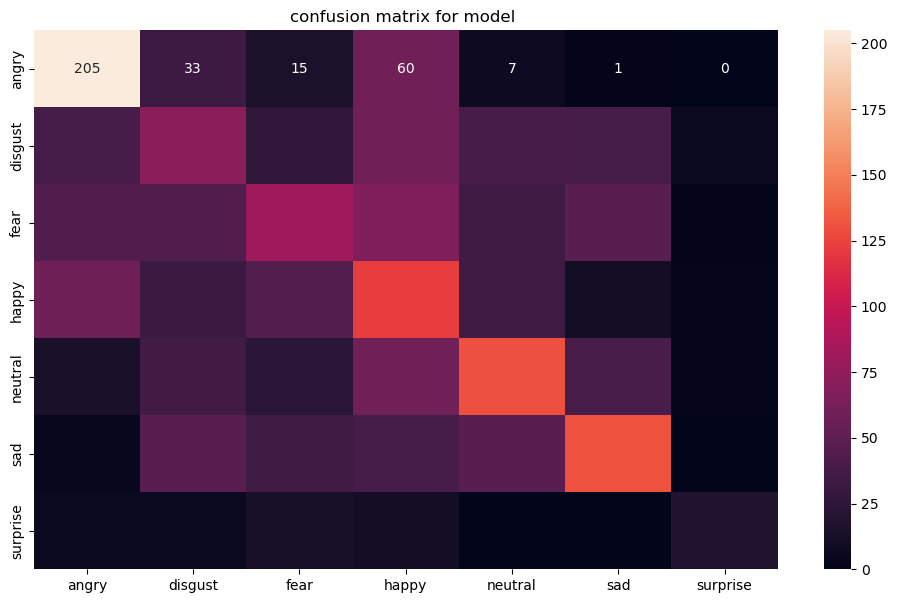

In [45]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [46]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

       angry       0.56      0.64      0.60       321
     disgust       0.26      0.26      0.26       276
        fear       0.34      0.26      0.29       316
       happy       0.29      0.41      0.34       301
     neutral       0.45      0.43      0.44       304
         sad       0.49      0.43      0.46       303
    surprise       0.64      0.35      0.45        52

    accuracy                           0.40      1873
   macro avg       0.43      0.39      0.41      1873
weighted avg       0.41      0.40      0.40      1873



In [47]:
model_path = "./res_model.h5"

model.save(model_path)